In [9]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as bmap

In [10]:
file = pd.read_csv("airports.csv")
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
id           8107 non-null int64
name         8107 non-null object
city         8107 non-null object
country      8107 non-null object
code         5880 non-null object
icao         8043 non-null object
latitude     8107 non-null float64
longitude    8107 non-null float64
altitude     8107 non-null int64
offset       8107 non-null float64
dst          8107 non-null object
timezone     8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


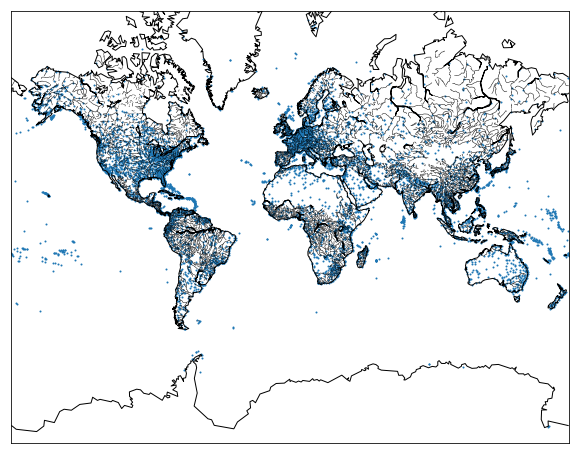

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
m = bmap(projection="merc",llcrnrlat= -80, urcrnrlat= 80, llcrnrlon= -180, urcrnrlon= 180) #merc is mercator projection, llcrnr is lower left corner, urcrnr is upper right corner
x,y = m(file["longitude"].tolist(), file["latitude"].tolist()) #basemap takes long and lat in form of list, converts 3D into 2D
m.scatter(x,y, s = 1) #s represents size of dot
m.drawcoastlines()
m.drawrivers()

In [12]:
geo = pd.read_csv("geo_routes.csv")
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


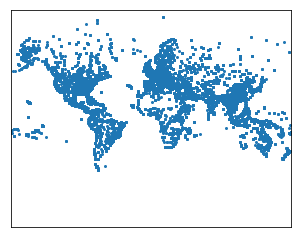

In [13]:
m = bmap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
x,y = m(geo["start_lon"].tolist(), geo["start_lat"].tolist())
m.scatter(x,y,s = 4)

In [14]:
def greatcircle(df):
    for i,row in df.iterrows():
        diff_lon = row["end_lon"] - row["start_lon"]
        diff_lat = row["end_lat"] - row["start_lat"]
        if abs(diff_lon) < 180:
            if abs(diff_lat) < 180:
                m.drawgreatcircle(row["start_lon"], row["start_lat"], row["end_lon"], row["end_lat"])

In [15]:
ruh = geo[geo["source"] == "RUH"]


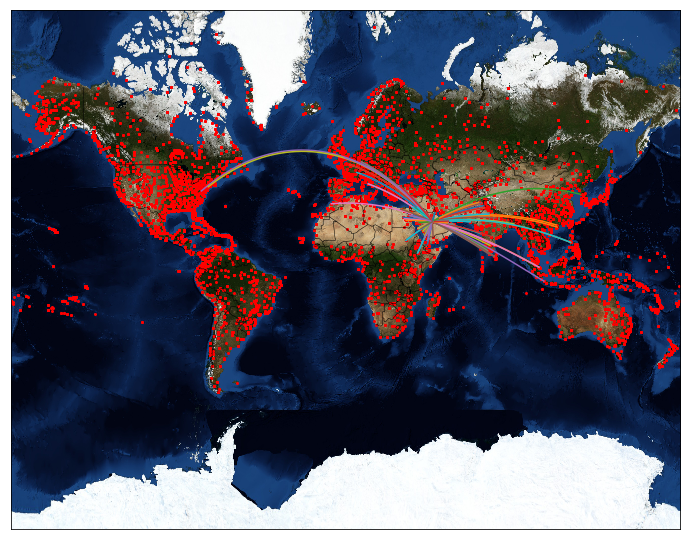

In [25]:
fig, ax= plt.subplots(figsize = (12,12))
m = bmap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
x,y = m(geo["start_lon"].tolist(), geo["start_lat"].tolist())
m.scatter(x,y,s = 4, color="red")
m.bluemarble()
m.drawcountries()
greatcircle(ruh)

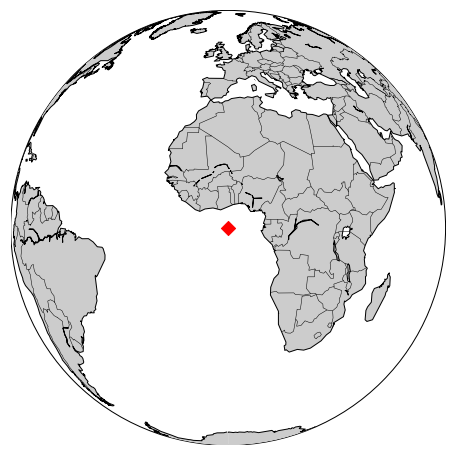

In [43]:
fig, ax = plt.subplots(figsize = (8,8))
m = bmap(projection="ortho", lat_0=0, lon_0=0,)
m.drawcountries()
x,y = m(0,0)
m.drawcoastlines()
m.fillcontinents()
m.scatter(x,y,marker='D',color='red', s=100)


